#### Problem Statement
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
# Importing Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Statistical Information

In [3]:
df.shape

(32560, 15)

- we have 32560 rows and 15 columns in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- we have combination of int and object type in the Dataset

In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- There is lot of difference b/w (mean and std) and (75% and max),we can clearly say there are lot of outliers and skewness present in data

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

#### Getting all object type unique values 

In [7]:
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [8]:
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
--------------------------------------
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse      

- we have 9 categeorical features
    * 'Workclass'
    * 'Education'
    * 'Marital_status'
    * 'Occupation'
    * 'Relationship'
    * 'Race'
    * 'Sex'
    * 'Native_country'
    * 'Income'

- Workclass feature has 9 categeorical varibales
     * Private
     * Self-emp-not-inc
     * Local-gov
     * ?
     * State-gov
     * Self-emp-inc
     * Federal-gov
     * Without-pay
     * Never-worked
- Education feature has 16 categeorical varibales
    - 9th,10th,11th,12th comes under high school grad but has mentioned seperately
     * HS-grad         10501
     * Some-college     7291
     * Bachelors        5354
     * Masters          1723
     * Assoc-voc        1382
     * 11th             1175
     * Assoc-acdm       1067
     * 10th              933
     * 7th-8th           646
     * Prof-school       576
     * 9th               514
     * 12th              433
     * Doctorate         413
     * 5th-6th           333
     * 1st-4th           168
     * Preschool          51
- Marital_status feature has 7 categeorical varibales
     * Married-civ-spouse       14976
     * Never-married            10682
     * Divorced                  4443
     * Separated                 1025
     * Widowed                    993
     * Married-spouse-absent      418
     * Married-AF-spouse           23
- Occupation feature has 15 categeorical varibales
     * Prof-specialty       4140
     * Craft-repair         4099
     * Exec-managerial      4066
     * Adm-clerical         3769
     * Sales                3650
     * Other-service        3295
     * Machine-op-inspct    2002
     * ?                    1843
     * Transport-moving     1597
     * Handlers-cleaners    1370
     * Farming-fishing       994
     * Tech-support          928
     * Protective-serv       649
     * Priv-house-serv       149
     * Armed-Forces            9
- Relationship feature has 6 categeorical varibales 
     * Husband           13193
     * Not-in-family      8304
     * Own-child          5068
     * Unmarried          3446
     * Wife               1568
     * Other-relative      981
- Race feature has 5 categeorical varibales 
     * White                 27815
     * Black                  3124
     * Asian-Pac-Islander     1039
     * Amer-Indian-Eskimo      311
     * Other                   271
- Sex feature has 2 categeorical varibales 
     * Male      21789
     * Female    10771
- Native_country has 42 categeorical varibales 
     * United-States                 29169
     * Mexico                          643
     * ?                               583
     * Philippines                     198
     * Germany                         137
     * Canada                          121
     * Puerto-Rico                     114
     * El-Salvador                     106
     * India                           100
     * Cuba                             95
     * England                          90
     * Jamaica                          81
     * South                            80
     * China                            75
     * Italy                            73
     * Dominican-Republic               70
     * Vietnam                          67
     * Guatemala                        64
     * Japan                            62
     * Poland                           60
     * Columbia                         59
     * Taiwan                           51
     * Haiti                            44
     * Iran                             43
     * Portugal                         37
     * Nicaragua                        34
     * Peru                             31
     * France                           29
     * Greece                           29
     * Ecuador                          28
     * Ireland                          24
     * Hong                             20
     * Cambodia                         19
     * Trinadad&Tobago                  19
     * Laos                             18
     * Thailand                         18
     * Yugoslavia                       16
     * Outlying-US(Guam-USVI-etc)       14
     * Honduras                         13
     * Hungary                          13
     * Scotland                         12
     * Holand-Netherlands                1
- Income has 2 categeorical varibales
     *  <=50K                            24719
     *  greater than 50K                 7841

##### Observation
    As we can see we have some '?' type categerical variables in the dataframe(Need to handle those)

#### Fetching all the numerical data and their unique values present in it

In [9]:
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='int64':
        features_list.append(feature_type)
for feature in features_list:
    print(feature)
    print(df[feature].unique())
    print('The length of the unique values is :', len(df[feature].unique()))
    print('--------------------------------------')

Age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
The length of the unique values is : 73
--------------------------------------
Fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302]
The length of the unique values is : 21647
--------------------------------------
Education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
The length of the unique values is : 16
--------------------------------------
Capital_gain
[    0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386  7298
  1409  3674  1055  3464  2050  2176  2174   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  206

- For Age feature we have total 73 unique values ranging between 17 and 88
    * fro this we can say that the data has the employees ranging from 17 and 88
- Fnlwgt has some amount of unique values which we cannot label encode
- Education_num has unique values such as [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
- Capital_gain has 119 unique values
- Capital_loss has 92 unique values
- Hours_per_week has 94 unique values

#### Checking/visualising for Null Values

<AxesSubplot:>

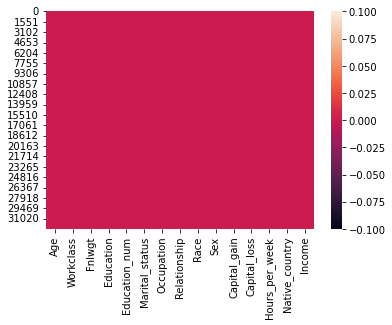

In [10]:
sns.heatmap(df.isnull())

- There are no Null values present in DF

###### Replacing '?' with unknown

In [11]:
# we have ? in Native_country, Occupation, Workclass
features = ['Native_country', 'Occupation', 'Workclass']
for feature in features:
    df.loc[df[feature]==' ?',feature] = np.nan

In [12]:
# Rechecking whether '?' is present in the features
for feature in features:
    print(f'{feature}: {df[(df[feature]==" ?")].any().sum()}')

Native_country: 0
Occupation: 0
Workclass: 0


#### Checking for NAN Values

In [13]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

- In the features where we have handled those itself has null values 

#### Comparing different features with Income

<AxesSubplot:xlabel='count', ylabel='Workclass'>

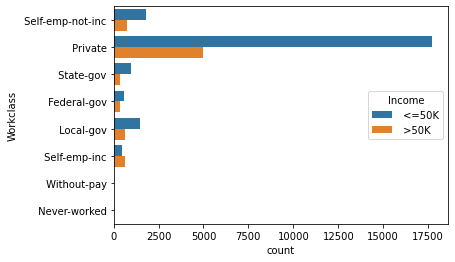

In [14]:
sns.countplot(y='Workclass',hue='Income',data = df)

- From the above graph we can say private jobs makes more income in <= 50k and >50k
- second comes self-emp-not-inc

<AxesSubplot:xlabel='count', ylabel='Education'>

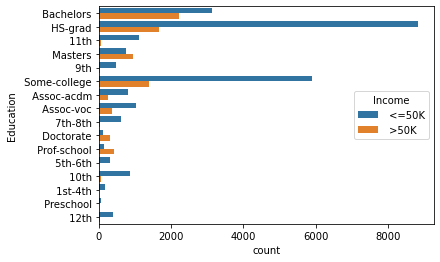

In [15]:
sns.countplot(y='Education',hue='Income',data=df)

- Employees with Bachelors are earning more than 50k in the dataset
- HS-grad people are mostly earning <= 50k in the entire dataset

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

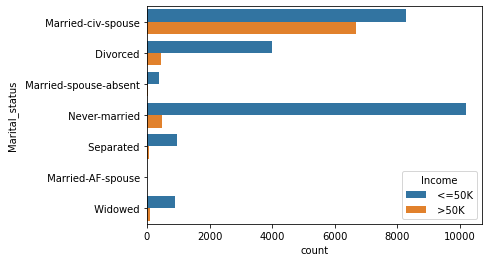

In [16]:
sns.countplot(y='Marital_status',hue='Income',data=df)

- Married-civ-spouse categeory people are more in earning >50k
- Never married people are more earning <=50k

<AxesSubplot:xlabel='count', ylabel='Occupation'>

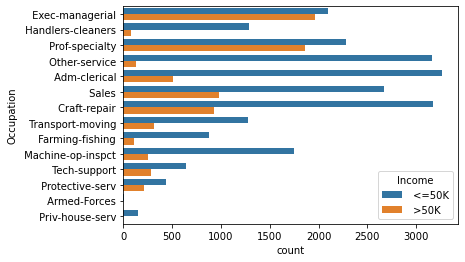

In [17]:
sns.countplot(y='Occupation',hue='Income',data=df)

- Exec-managerial(position) hirrearchy people are more in earning >50k
- Adm-clerical people are more in earning <=50k

<AxesSubplot:xlabel='count', ylabel='Relationship'>

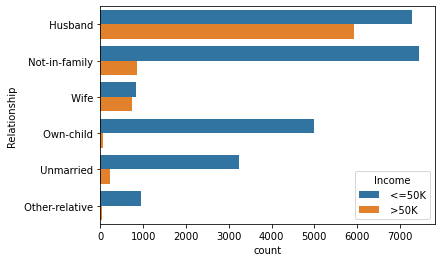

In [18]:
sns.countplot(y='Relationship',hue='Income',data=df)

- Husbands are more in number who are making >50k
- Not-in-family are very high in number who are getting <=50k

<AxesSubplot:xlabel='count', ylabel='Race'>

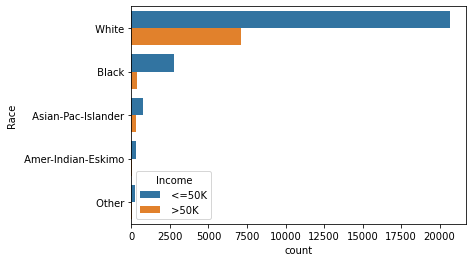

In [19]:
sns.countplot(y='Race',hue='Income',data=df)

- Comparingly with all the categeries in the Race feature white people are more in getting <=50k and >50k

<AxesSubplot:xlabel='Sex', ylabel='count'>

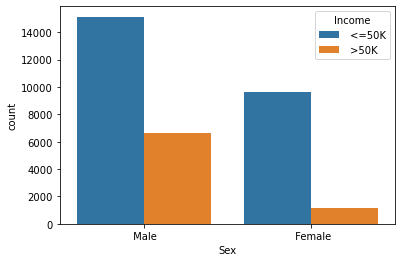

In [20]:
sns.countplot(x='Sex',hue='Income',data=df)

- Comparingly with both the categeries in the Sex feature Males are more in getting <=50k and >50k

<AxesSubplot:xlabel='count', ylabel='Native_country'>

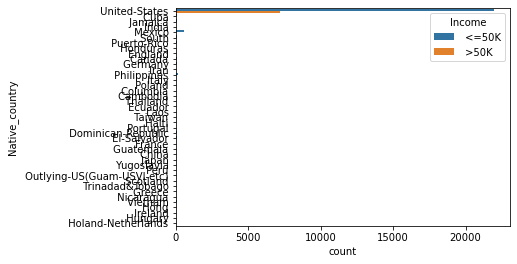

In [21]:

sns.countplot(y='Native_country',hue='Income',data=df,)

- United States people are more in the dataset following mexico people

<AxesSubplot:xlabel='Age', ylabel='Income'>

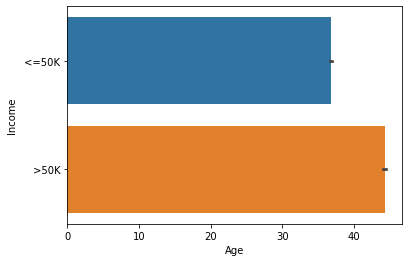

In [22]:
sns.barplot(x='Age',y='Income',data=df)

- People whose age is more than 35 are teh on ewho are making > 50k as income

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

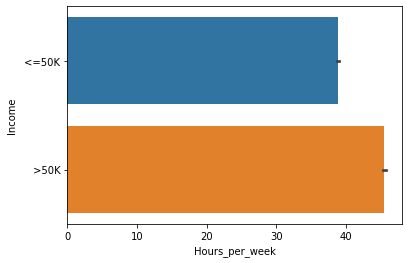

In [23]:
sns.barplot(x='Hours_per_week',y='Income',data=df)

- people who are working more than 38 hours per week are getting >50 k as income. 

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

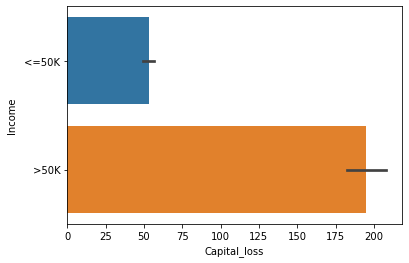

In [24]:
sns.barplot(x='Capital_loss',y='Income',data=df)

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

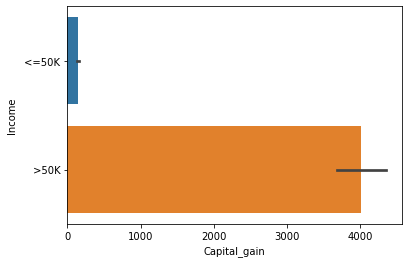

In [25]:
sns.barplot(x='Capital_gain',y='Income',data=df)

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

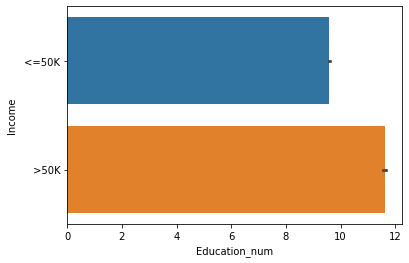

In [26]:
sns.barplot(x='Education_num',y='Income',data=df)

- People who have studied for more than 9 years are getting more than 50 kas Income

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

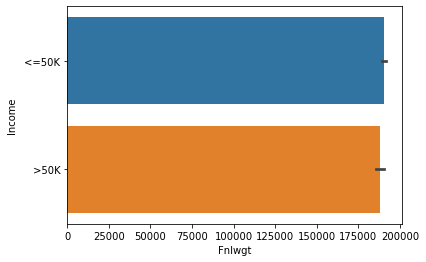

In [27]:
sns.barplot(x='Fnlwgt',y='Income',data=df)

- As Fnlwgt is the sampling weight we can see data is equally distributed

###### As per the graph of comparision of work class and income we can see private related data is more so adding that to all nan values

###### Using Simple Imputer

In [28]:
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
si = SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)
si = si.fit(df[['Workclass']])
df[['Workclass']] = si.transform(df[['Workclass']])
df[['Workclass']].isnull().sum()

Workclass    0
dtype: int64

In [29]:
df['Native_country'].isnull().sum() #we have 583 null values

583

In [30]:
# Adding the most occurred variable in the Native country feature
si = si.fit(df[['Native_country']])
df[['Native_country']] = si.transform(df[['Native_country']])
df[['Native_country']].isnull().sum()

Native_country    0
dtype: int64

In [31]:
df['Occupation'].isnull().sum() #we have 1843 null values

1843

In [32]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

- prof-speciality has highest occurence in dataset ,but the other features are also in the same range so,
it is not correct to take the highest occurence variable
- so its better to drop the null values as they are less in number in the total shape

In [33]:
print(df.shape)

(32560, 15)


In [34]:
df.dropna(inplace=True)

In [35]:
print(df.shape)

(30717, 15)


In [36]:
print('The data loss after dropping null values',(32560-30717)/32560 * 100 )

The data loss after dropping null values 5.66031941031941


In [37]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30717.000000,3.071700e+04,30717.000000,30717.000000,30717.000000,30717.000000
mean,38.443565,1.898492e+05,10.130221,1106.002311,88.913110,40.949344
std,13.118441,1.054581e+05,2.562458,7497.982938,405.663489,11.985576
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Mean and 505 in continuous and discrete columns are similar indicating a normal distribution
in age column
- A higher std in capital_gain and capital_loss and std being close to mean
in case of Fnlwgt indicate skewness in their respective data distributions

#### Finding Skewness

In [38]:
df.skew()

Age                0.531692
Fnlwgt             1.457202
Education_num     -0.310305
Capital_gain      11.785715
Capital_loss       4.514245
Hours_per_week     0.331806
dtype: float64

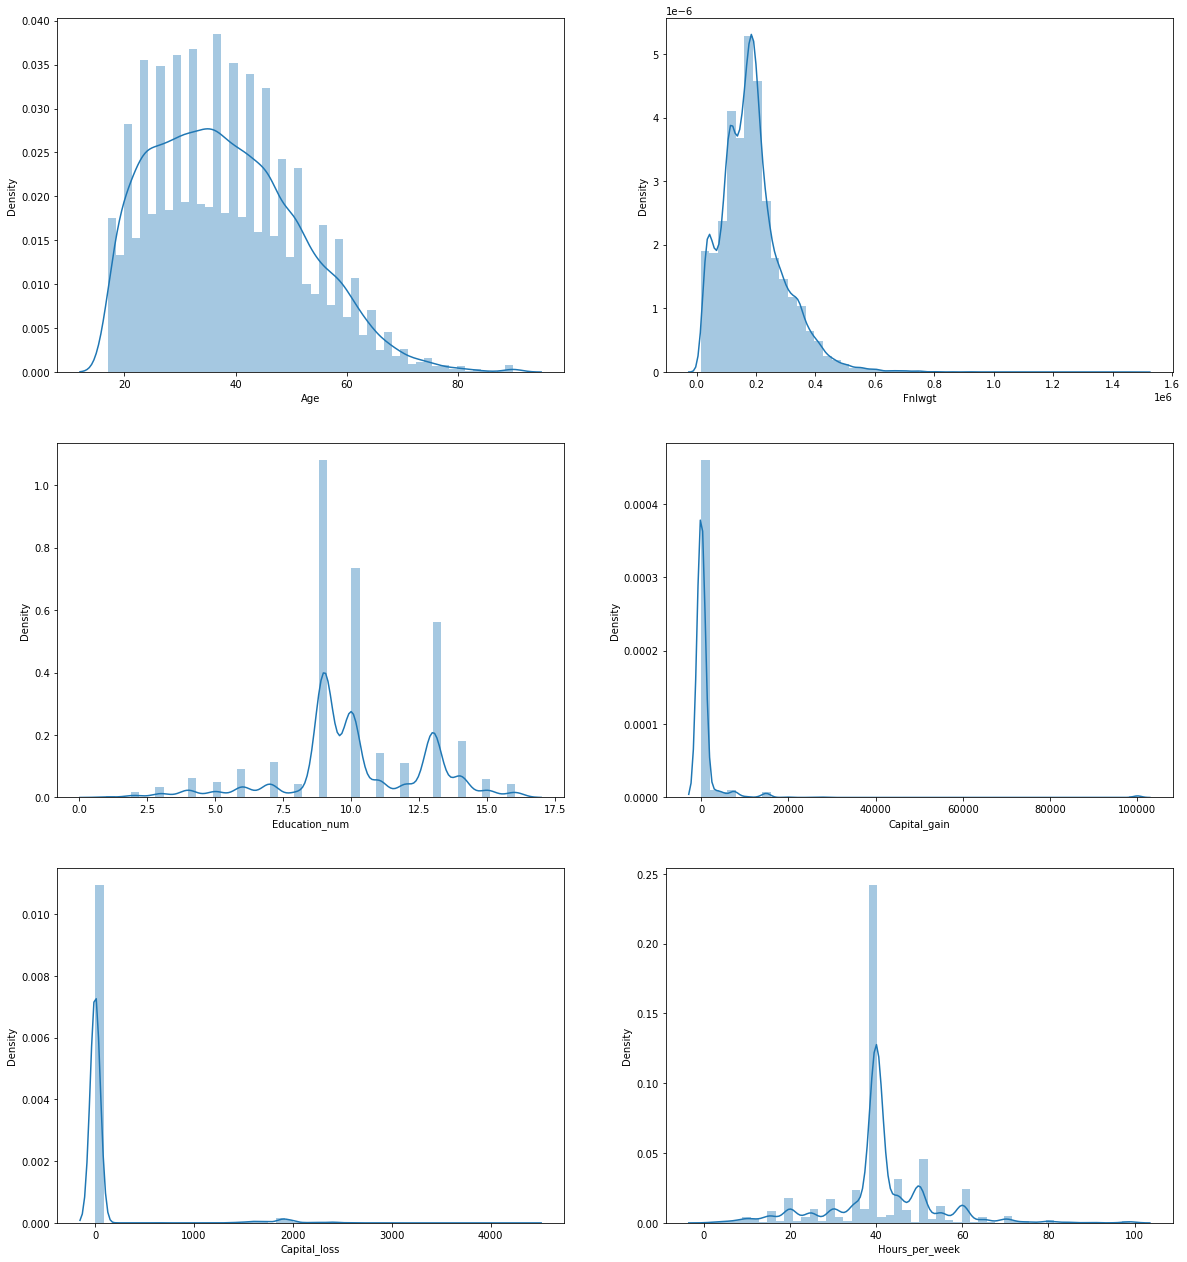

In [39]:
num_cols = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
plt.figure(figsize=(20,30),facecolor='white')
plotnum = 1
for i in num_cols:
    if plotnum <=10:
        plt.subplot(4,2,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

- As per the graph there is lot of skewness in the data

In [40]:
df['Income'].value_counts()

 <=50K    23067
 >50K      7650
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

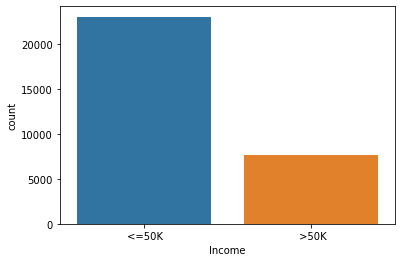

In [41]:
sns.countplot(df['Income'])

- There is class imbalance in label column/target variable

#### Checking for outliers in Dataset

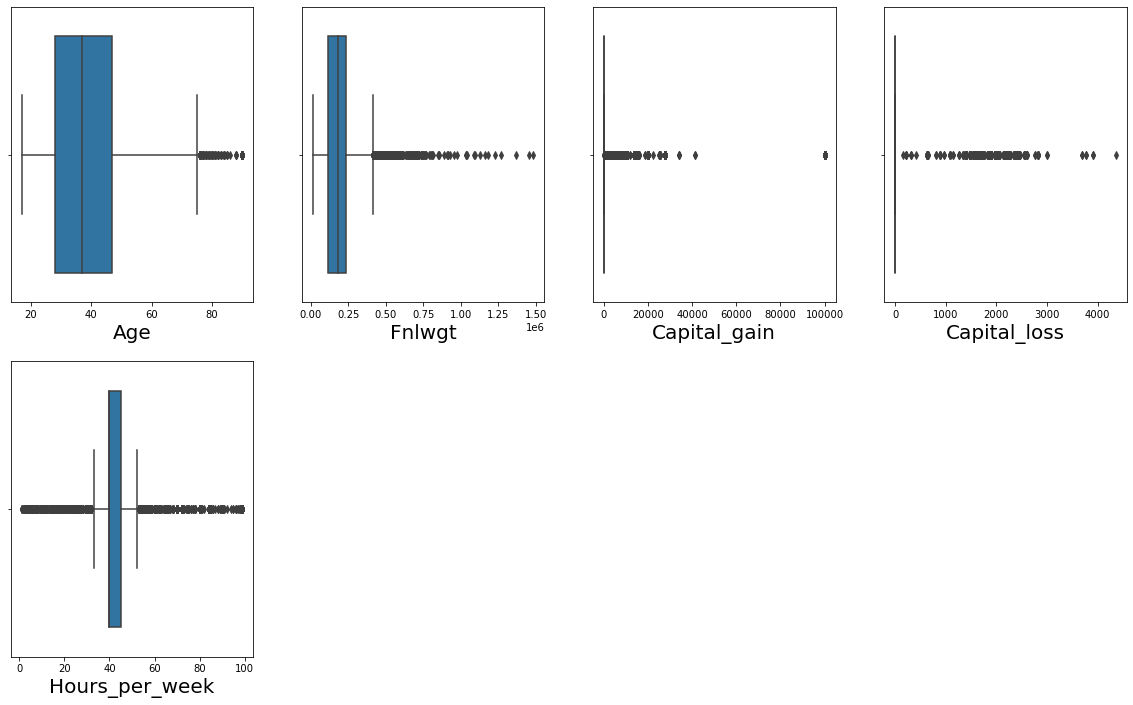

In [42]:
x = df.drop(columns=['Income'])
y = df['Income']
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for col in x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=6:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()



- All columns have outliers

##### Using z-score method

In [43]:
zdf = x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

In [44]:
from scipy.stats import zscore
zscor = zscore(zdf)
z_score_abs = np.abs(zscor)
zdf1 = zdf[(z_score_abs < 3).all(axis=1)]
print(zdf.shape)
print(zdf1.shape)

(30717, 5)
(28289, 5)


In [45]:
print('The data loss after applying zscore',(30717-28289)/30717 * 100 )

The data loss after applying zscore 7.904417749129148


##### Using IQR method

In [46]:
iqr_df = x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()
indxdrop = np.array([])
for colmn in iqr_df:
    q1=iqr_df[colmn].quantile(0.25)
    q3=iqr_df[colmn].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = iqr_df[colmn]
    indx = col[(col>upperval) | (col<lowerval)].index
    indxdrop = np.append(indxdrop, indx)

In [47]:
iqr_df = iqr_df.drop(indxdrop)
iqr_df.shape

(18906, 5)

In [48]:
print('The data loss after applying zscore',(30717-18906)/30717 * 100 )

The data loss after applying zscore 38.4510206074812


- 38.45% data loss is not in acceptable range so going with zscore method

In [49]:
dropindx = x.index.difference(zdf1.index)
df.drop(dropindx,inplace=True)

In [50]:
df.shape

(28289, 15)

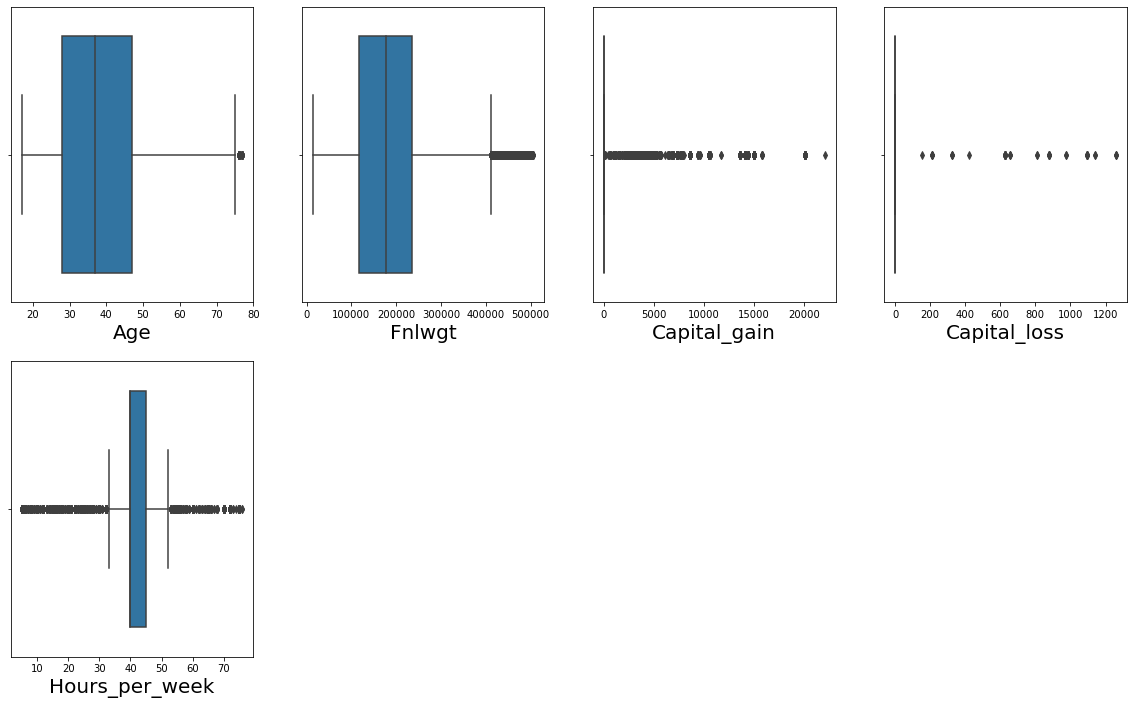

In [51]:
x = df.drop(columns=['Income'])
y = df['Income']
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1
for col in x[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=6:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- Some of the outliers has been taken out from data

In [52]:
x.skew()

Age                0.447864
Fnlwgt             0.630039
Education_num     -0.322370
Capital_gain       4.873194
Capital_loss      29.355524
Hours_per_week    -0.278405
dtype: float64

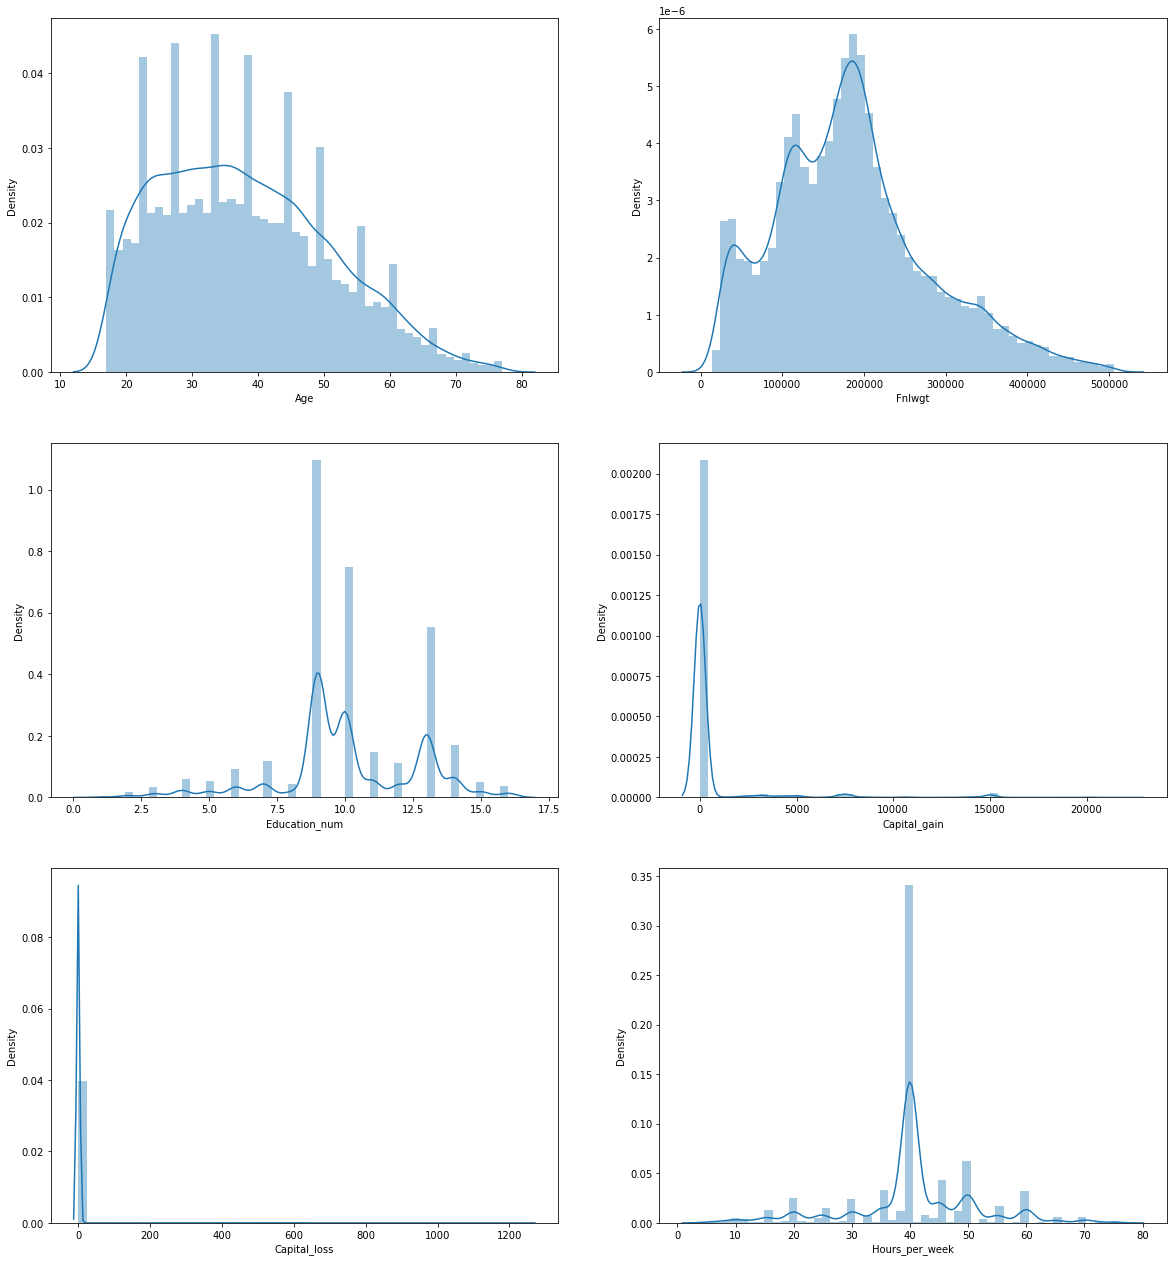

In [53]:
num_cols = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
plt.figure(figsize=(20,30),facecolor='white')
plotnum = 1
for i in num_cols:
    if plotnum <=10:
        plt.subplot(4,2,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
    plotnum+=1
plt.show()

- Still the skewness is present in the dataset

#### Reduce skewness using power transformer

In [54]:
from sklearn.preprocessing import PowerTransformer
pow_trans = PowerTransformer(method='yeo-johnson',standardize=True)
df_pt = x[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
transformed = pow_trans.fit_transform(df_pt)
transformed = pd.DataFrame(transformed,columns=df_pt.columns)
transformed.skew()

Age               -0.020696
Fnlwgt            -0.034745
Education_num      0.028845
Capital_gain       3.065023
Capital_loss      24.739539
Hours_per_week     0.126428
dtype: float64

In [55]:
transformed.index = df.index
df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]=transformed[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.956462,Self-emp-not-inc,-1.120230,Bachelors,1.194557,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.297417,-0.040357,-2.340487,United-States,<=50K
1,0.123498,Private,0.421868,HS-grad,-0.469670,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.297417,-0.040357,-0.074191,United-States,<=50K
2,1.140512,Private,0.602192,11th,-1.218162,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.297417,-0.040357,-0.074191,United-States,<=50K
3,-0.739980,Private,1.483805,Bachelors,1.194557,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.297417,-0.040357,-0.074191,Cuba,<=50K
4,0.045475,Private,1.044392,Masters,1.641275,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.297417,-0.040357,-0.074191,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.838505,Private,0.807262,Assoc-acdm,0.759506,Married-civ-spouse,Tech-support,Wife,White,Female,-0.297417,-0.040357,-0.261889,United-States,<=50K
32556,0.275003,Private,-0.213232,HS-grad,-0.469670,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.297417,-0.040357,-0.074191,United-States,>50K
32557,1.430358,Private,-0.240977,HS-grad,-0.469670,Widowed,Adm-clerical,Unmarried,White,Female,-0.297417,-0.040357,-0.074191,United-States,<=50K
32558,-1.376664,Private,0.283315,HS-grad,-0.469670,Never-married,Adm-clerical,Own-child,White,Male,-0.297417,-0.040357,-1.817881,United-States,<=50K


#### Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28289 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             28289 non-null  float64
 1   Workclass       28289 non-null  int64  
 2   Fnlwgt          28289 non-null  float64
 3   Education       28289 non-null  int64  
 4   Education_num   28289 non-null  float64
 5   Marital_status  28289 non-null  int64  
 6   Occupation      28289 non-null  int64  
 7   Relationship    28289 non-null  int64  
 8   Race            28289 non-null  int64  
 9   Sex             28289 non-null  int64  
 10  Capital_gain    28289 non-null  float64
 11  Capital_loss    28289 non-null  float64
 12  Hours_per_week  28289 non-null  float64
 13  Native_country  28289 non-null  int64  
 14  Income          28289 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.5 MB


- Now all are converted into numerical type

#### Correlation

In [58]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.070187,-0.067057,0.010716,0.073054,-0.331500,-0.011881,-0.262940,0.016434,0.088938,0.118675,0.020126,0.167005,-0.006246,0.266015
Workclass,0.070187,1.000000,-0.034529,0.015810,0.038896,-0.031695,0.015487,-0.066431,0.041287,0.072492,0.009543,-0.008073,0.042678,0.008942,0.009868
Fnlwgt,-0.067057,-0.034529,1.000000,-0.023879,-0.041612,0.032350,-0.002537,0.007731,-0.007969,0.025141,-0.006192,-0.002969,-0.024532,-0.070561,-0.008234
Education,0.010716,0.015810,-0.023879,1.000000,0.316666,-0.037366,-0.038865,-0.009984,0.013213,-0.031519,0.020932,-0.003310,0.057778,0.081989,0.074275
Education_num,0.073054,0.038896,-0.041612,0.316666,1.000000,-0.056509,0.091751,-0.094135,0.030035,0.004924,0.112201,0.007660,0.156417,0.080568,0.325751
Marital_status,-0.331500,-0.031695,0.032350,-0.037366,-0.056509,1.000000,0.023168,0.178351,-0.066830,-0.115677,-0.063428,-0.016558,-0.190305,-0.024024,-0.190401
Occupation,-0.011881,0.015487,-0.002537,-0.038865,0.091751,0.023168,1.000000,-0.051729,0.000481,0.063375,0.008904,0.000168,0.012335,-0.001546,0.044850
Relationship,-0.262940,-0.066431,0.007731,-0.009984,-0.094135,0.178351,-0.051729,1.000000,-0.116407,-0.580525,-0.080336,0.040640,-0.266164,-0.010434,-0.245473
Race,0.016434,0.041287,-0.007969,0.013213,0.030035,-0.066830,0.000481,-0.116407,1.000000,0.089746,0.023516,-0.001797,0.052792,0.119658,0.071706
Sex,0.088938,0.072492,0.025141,-0.031519,0.004924,-0.115677,0.063375,-0.580525,0.089746,1.000000,0.065636,-0.036825,0.235274,0.000901,0.209708


#### Visualising correlation

<AxesSubplot:>

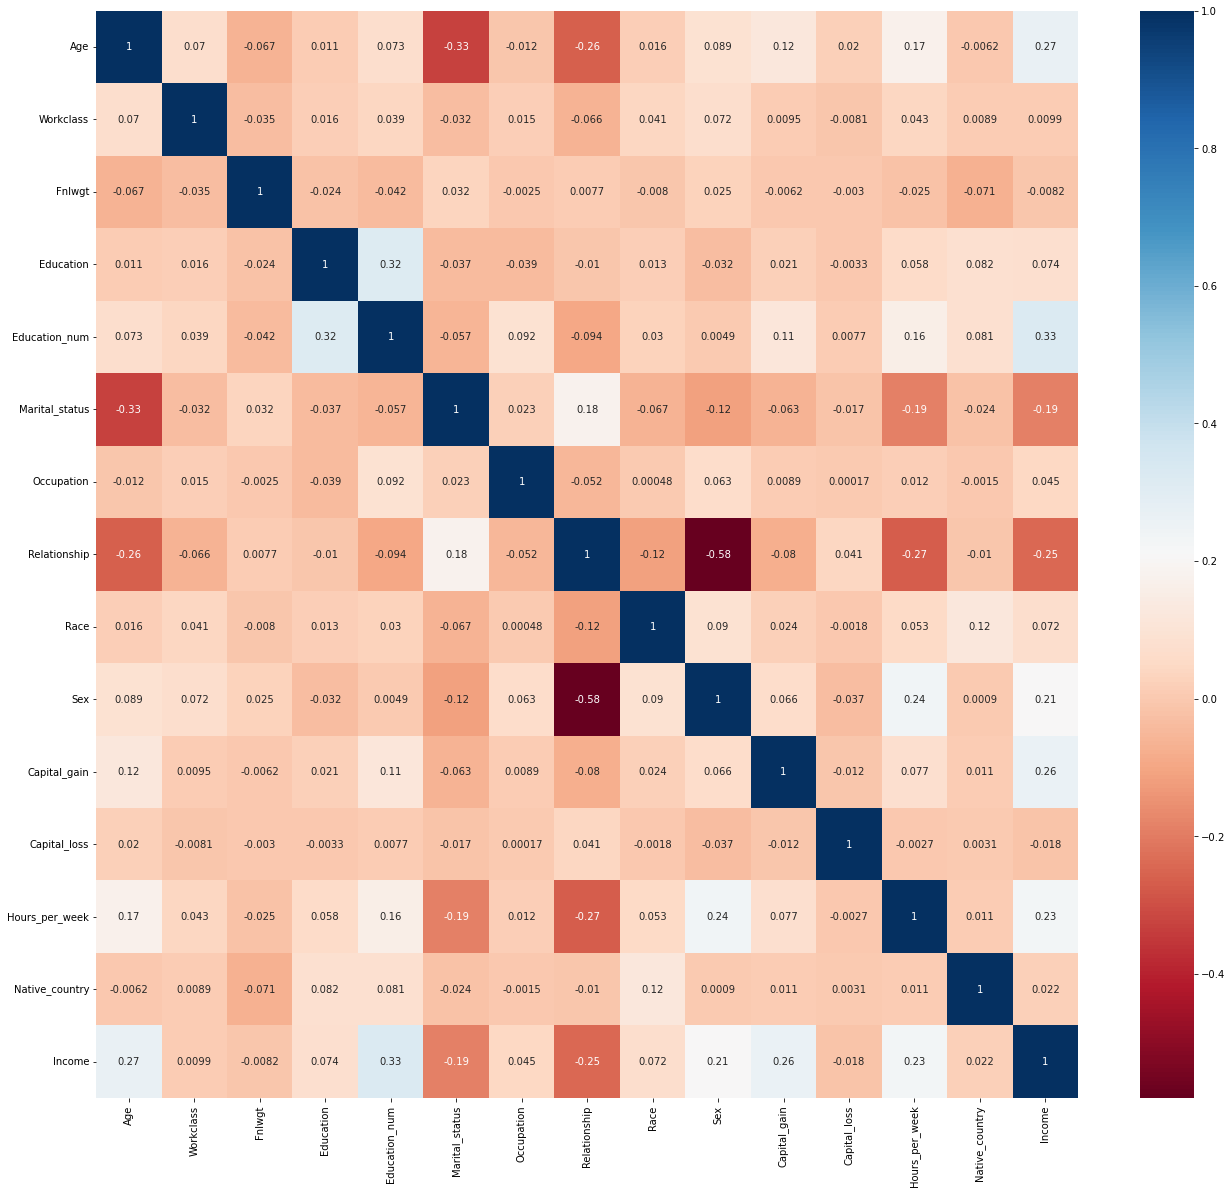

In [59]:
plt.figure(figsize=(22,20))
sns.heatmap(df.corr(),annot=True,cmap = 'RdBu')

<AxesSubplot:>

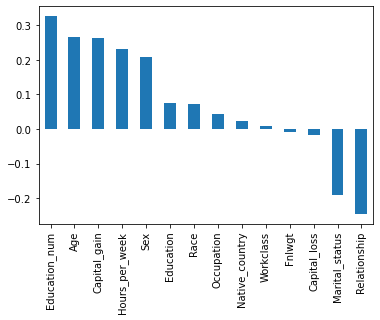

In [60]:
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')

In [61]:
x = df.drop(columns=['Income'])
y = df['Income']

#### feature Selection

In [62]:
# Performing standard scalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_x = scalar.fit_transform(x)

#### Checking multicollinearity using variation inflation factor

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif']= [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [64]:
vif

,Features,vif
0,Age,1.216644
1,Workclass,1.013098
2,Fnlwgt,1.012968
3,Education,1.123762
4,Education_num,1.175947
5,Marital_status,1.159692
6,Occupation,1.019549
7,Relationship,1.670515
8,Race,1.033502
9,Sex,1.559718


- There is no multi collinearity among the features

#### Principle component analaysis

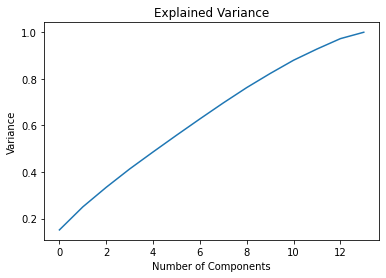

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
principle_comp = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

- 50 components explain around 95 % of data

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best_features = SelectKBest(score_func=f_classif, k=14)
best_fit = k_best_features.fit(x,y)
dfscores = pd.DataFrame(best_fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(15,'Score'))

           Feature        Score
4    Education_num  3357.962026
0              Age  2154.140059
10    Capital_gain  2110.175393
7     Relationship  1813.781634
12  Hours_per_week  1595.012540
9              Sex  1301.218494
5   Marital_status  1064.047769
3        Education   156.920236
8             Race   146.195410
6       Occupation    57.015167
13  Native_country    14.288924
11    Capital_loss     9.017911
1        Workclass     2.755006
2           Fnlwgt     1.917792


In [67]:
x_best = x.drop(columns=['Fnlwgt','Native_country','Capital_loss'])
scaled_x_best = scalar.fit_transform(x_best)

#### Handling class imbalance using smote technique

In [68]:
from imblearn.over_sampling import SMOTE as sm
sm_x,sm_y = sm().fit_resample(scaled_x_best,y.ravel())

#### Finding the best random state

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(sm_x,sm_y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7680355160932297 on random_state: 87


- after finding best random state we got best accuracy as 76% and random state as 86

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from xgboost import XGBClassifier

In [71]:
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = train_test_split(sm_x,sm_y,test_size = .31, random_state = 86)
models = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier()]
def compare_models():
    for model in models:
        
        model.fit(x_train,y_train)
        model_predict = model.predict(x_test)
        accurcy = classification_report(y_test,model_predict)
        score_r2 = r2_score(y_test, model_predict)
        mean_error = mean_squared_error(y_test, model_predict)
        crossval_score = cross_val_score(model,x,y,cv=4).mean()
        print('Accuracy : ',accurcy)
        print("R2 score of the model : ",model,"=",round(score_r2*100,1),"%")
        print("mean squared error for model : ",model,"=",mean_error)
        print("cross val score for model : ",model, "=",crossval_score)
        print('_______________________________________________')
compare_models()

Accuracy :                precision    recall  f1-score   support

           0       0.77      0.75      0.76      6719
           1       0.76      0.78      0.77      6796

    accuracy                           0.76     13515
   macro avg       0.76      0.76      0.76     13515
weighted avg       0.76      0.76      0.76     13515

R2 score of the model :  LogisticRegression() = 5.8 %
mean squared error for model :  LogisticRegression() = 0.23536810950795412
cross val score for model :  LogisticRegression() = 0.8190109722749119
_______________________________________________
Accuracy :                precision    recall  f1-score   support

           0       0.88      0.76      0.81      6719
           1       0.79      0.89      0.84      6796

    accuracy                           0.83     13515
   macro avg       0.83      0.83      0.83     13515
weighted avg       0.83      0.83      0.83     13515

R2 score of the model :  SVC() = 30.7 %
mean squared error for model :  SV

- going with XGB classifier as it has good accuracy and cross val score

#### Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV
parameter = {'booster':['gbtree','gblinear'],'eta':[0.001,0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,30,40,50,60,70,80],'subsample':[0.5,1]}
grid_classifier = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs=-1,verbose=1)
grid_classifier.fit(x_train,y_train)
print(f"The best parameters are {grid_classifier.best_params_}")
print(f"The best Score is {grid_classifier.best_score_}")


Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[12:45:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:45:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if

[12:45:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:45:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:45:52] WARNING: /Users/runner/wo

[12:46:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:07] WARNING: /Users/runner/wo

[12:46:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:08] WARNING: /Users/runner/wo

[12:46:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:11] WARNING: /Users/runner/wo

[12:46:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:16] WARNING: /Users/runner/wo

[12:46:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:17] WARNING: /Users/runner/wo

[12:46:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:20] WARNING: /Users/runner/wo

[12:46:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:28] WARNING: /Users/runner/wo

[12:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:28] WARNING: /Users/runner/wo

[12:46:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:30] WARNING: /Users/runner/wo

[12:46:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:36] WARNING: /Users/runner/wo

[12:46:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:37] WARNING: /Users/runner/wo

[12:46:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:40] WARNING: /Users/runner/wo

[12:46:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:47] WARNING: /Users/runner/wo

[12:46:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:47] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:48] WARNING: /Users/runner/wo

[12:46:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:50] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:51] WARNING: /Users/runner/wo

[12:46:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:56] WARNING: /Users/runner/wo

[12:46:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:46:57] WARNING: /Users/runner/wo

[12:46:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:00] WARNING: /Users/runner/wo

[12:47:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:07] WARNING: /Users/runner/wo

[12:47:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:08] WARNING: /Users/runner/wo

[12:47:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:10] WARNING: /Users/runner/wo

[12:47:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:16] WARNING: /Users/runner/wo

[12:47:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:16] WARNING: /Users/runner/wo

[12:47:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:20] WARNING: /Users/runner/wo

[12:47:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:27] WARNING: /Users/runner/wo

[12:47:26] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:27] WARNING: /Users/runner/wo

[12:47:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:30] WARNING: /Users/runner/wo

[12:47:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:35] WARNING: /Users/runner/wo

[12:47:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:36] WARNING: /Users/runner/wo

[12:47:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:40] WARNING: /Users/runner/wo

[12:47:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:46] WARNING: /Users/runner/wo

[12:47:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:47] WARNING: /Users/runner/wo

[12:47:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:49] WARNING: /Users/runner/wo

[12:47:54] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:55] WARNING: /Users/runner/wo

[12:47:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:47:56] WARNING: /Users/runner/wo

[12:47:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:00] WARNING: /Users/runner/wo

[12:48:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:07] WARNING: /Users/runner/wo

[12:48:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:07] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:07] WARNING: /Users/runner/wo

The best parameters are {'booster': 'gbtree', 'eta': 0.3, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 1}
The best Score is 0.8972704652376151


In [80]:
Best_mod1 = XGBClassifier(booster='gbtree',eta = 0.3,max_depth=10,min_child_weight=1,subsample=1)
Best_mod1.fit(x_train,y_train)
rfrpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfrpred)
print(acc*100)

63.23965026396816


#### saving the Model

In [81]:
import joblib
joblib.dump(Best_mod1,"income_census.pkl")

['income_census.pkl']

#### loading the Model

In [82]:
mod = joblib.load("income_census.pkl")

In [83]:
output_df = pd.DataFrame({'predections':mod.predict(x_test),'actual values':y_test})

In [84]:
output_df

,predections,actual values
0,0,1
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
13510,1,1
13511,0,0
13512,1,0
13513,1,1
